# Overview of Today's Class

* Unsupervised learning models
* Probability based learning
    * Bayesian statistics
    * Naive bayesian model
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Unsupervised Learning: Clustering Methods

![](https://www.tutorialandexample.com/wp-content/uploads/2019/11/An-example-of-a-cluster-system.png)

![](https://fullcircle-cms.com/fullcircle/storage/uploads/2019/07/03/5d1ca1b9199dbClustering-GIF-2.gif)

## k-Means clustering

### The algorithm
* The model training process
![](https://stanford.edu/~cpiech/cs221/img/kmeansViz.png)

* Pseudo code:
![](https://stanford.edu/~cpiech/cs221/img/kmeansMath.png)

* The model training process (dynamic demonstration)
![](https://miro.medium.com/max/1280/1*rwYaxuY-jeiVXH0fyqC_oA.gif)

### Fit and predict

* Reference on function `make_blobs`: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

In [2]:
## generate some sample data

from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std, random_state=123)

In [3]:
X

array([[-0.15181454,  2.41345093],
       [-1.39209388,  2.19069284],
       [-2.78188874,  1.88664335],
       ...,
       [-2.82048135,  1.81572732],
       [-2.8358594 ,  1.79380691],
       [-2.6970689 ,  1.77449632]])

In [4]:
X.shape

(2000, 2)

In [5]:
y

array([0, 1, 2, ..., 2, 2, 2])

In [6]:
np.unique(y)

array([0, 1, 2, 3, 4])

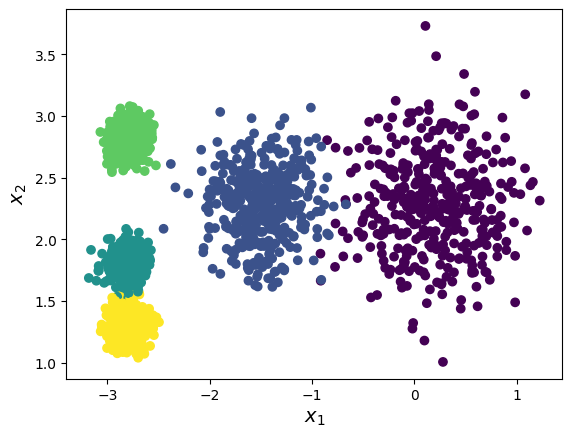

In [7]:
## plot the sample data

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

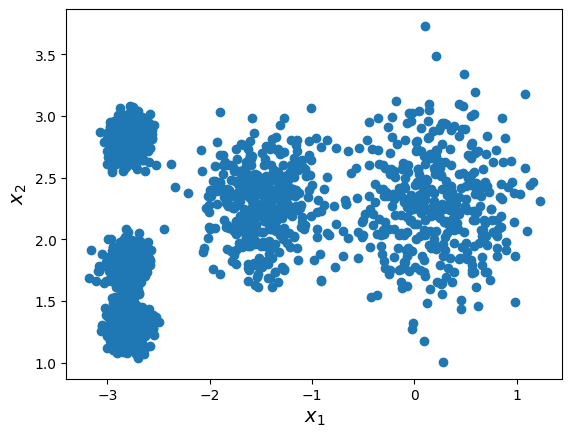

In [8]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

In [9]:
## Fit a K-Means clustering model

from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters=k, random_state=123)
# kmenas.fit(X)
# y_pred = kmeans.predict(X)
y_pred = kmeans.fit_predict(X)

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [10]:
X[:5]

array([[-0.15181454,  2.41345093],
       [-1.39209388,  2.19069284],
       [-2.78188874,  1.88664335],
       [ 0.41340433,  2.13375225],
       [-2.78558536,  1.2906933 ]])

In [11]:
y_pred[:5]

array([2, 1, 4, 2, 0], dtype=int32)

In [12]:
set(y_pred)

{0, 1, 2, 3, 4}

In [13]:
kmeans.labels_

array([2, 1, 4, ..., 4, 4, 4], dtype=int32)

In [14]:
kmeans.cluster_centers_

array([[-2.79959856,  1.30967879],
       [-1.45400251,  2.28240421],
       [ 0.22211271,  2.29488501],
       [-2.7979204 ,  2.80239567],
       [-2.80240931,  1.80817477]])

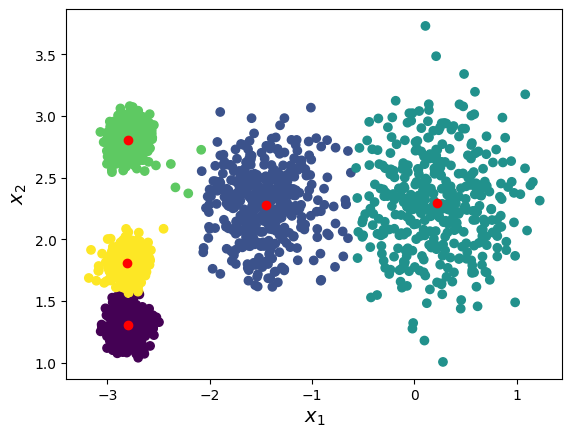

In [15]:
## plot the estimated centroids with the raw data

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')
    
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

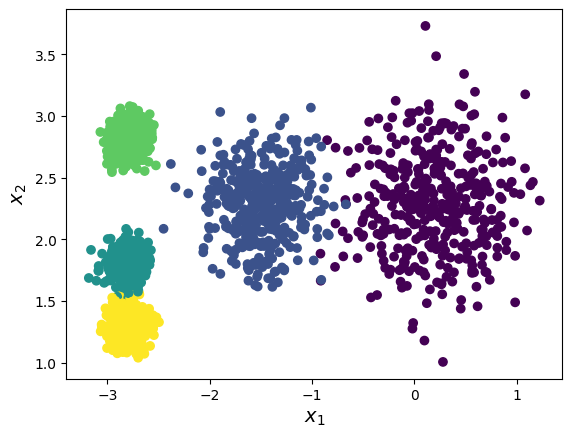

In [16]:
## plot the sample data

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

In [17]:
## predict labels of new instances

X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([2, 2, 3, 3], dtype=int32)

In [18]:
kmeans.transform(X_new)

array([[2.88345201, 1.48117367, 0.36917641, 2.91070393, 2.80896687],
       [5.84053823, 4.4629464 , 2.79349512, 5.85318031, 5.80557927],
       [1.70215937, 1.70442129, 3.29836284, 0.28263694, 1.20809332],
       [1.20707303, 1.56123546, 3.22863477, 0.36370222, 0.71948887]])

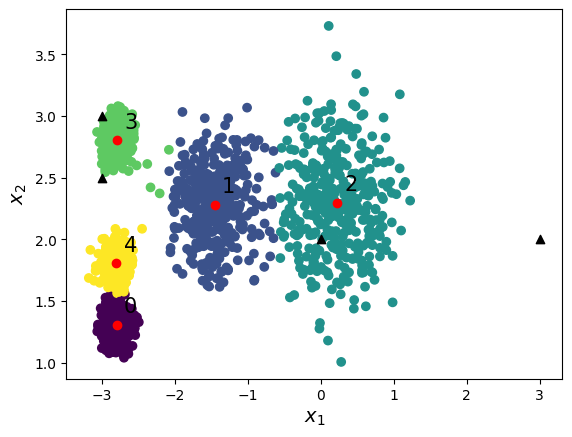

In [19]:
## visualize the new data points

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')
plt.scatter(X_new[:,0], X_new[:,1], marker='^', c='k')


#### label the clusters
centers = kmeans.cluster_centers_
labels = kmeans.predict(centers)
for i in range(5):
    plt.text(centers[i][0]+0.1, centers[i][1]+0.1, labels[i], fontsize=15)

plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

### The decision boundaries (the `voronoi diagram`)

In [20]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=2,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

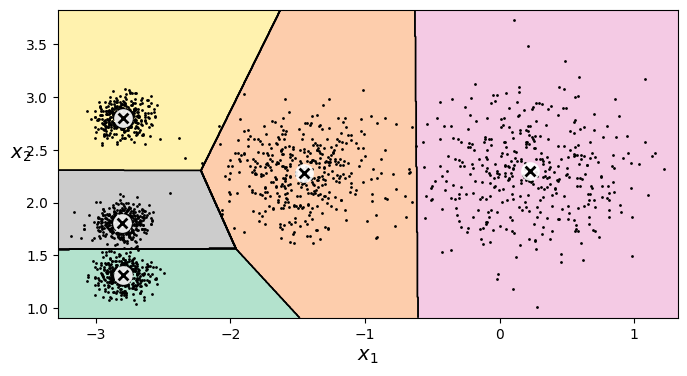

In [21]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)

plt.show()

In [22]:
X_new

array([[ 0. ,  2. ],
       [ 3. ,  2. ],
       [-3. ,  3. ],
       [-3. ,  2.5]])

### The algorithm demonstration

* Initialize the centroids randomly

In [23]:
# help(KMeans)

In [24]:
## run the kmeans algorithm 1, 2, and 3 iterations, see how the centroids move around

kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=1, random_state=123)
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=2, random_state=123)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="lloyd", max_iter=3, random_state=123)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(init='random', max_iter=3, n_clusters=5, n_init=1, random_state=123)

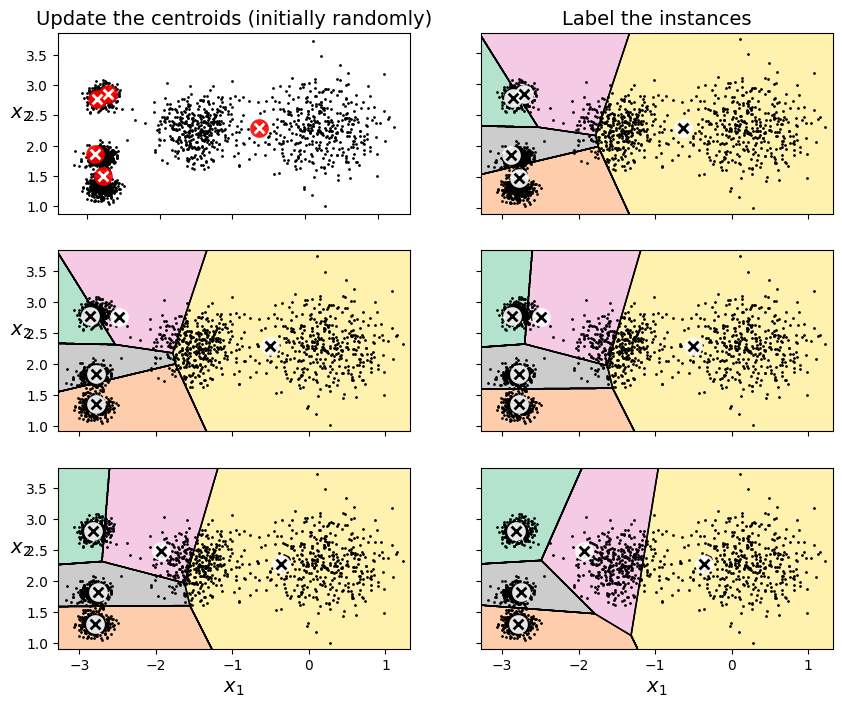

In [25]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

* Depending on the centroids initialization, the model might converge to different solutions (different local optimums)

In [26]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

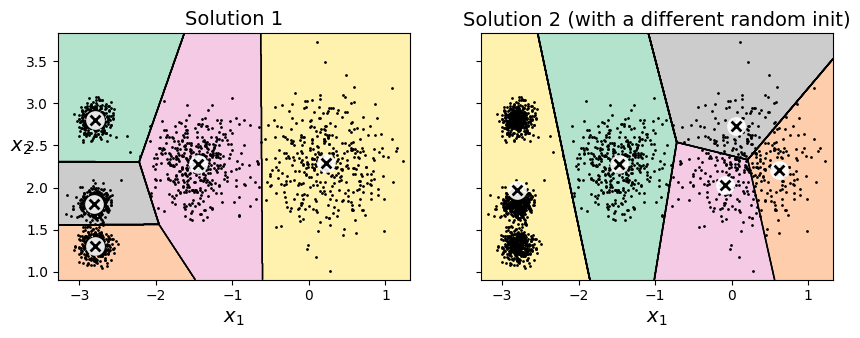

In [27]:
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=123)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=1)

plot_clusterer_comparison(kmeans_rnd_init1, kmeans_rnd_init2, X,
                          "Solution 1", "Solution 2 (with a different random init)")

plt.show()

* Random number generator and seed

In [28]:
np.random.randint(low=0, high=3, size=5)

array([1, 1, 2, 0, 2])

In [29]:
np.random.randint(low=0, high=3, size=5)

array([0, 1, 2, 0, 2])

In [30]:
np.random.randint(low=0, high=3, size=5)

array([2, 0, 0, 2, 0])

In [31]:
np.random.seed(123)
np.random.randint(low=0, high=3, size=5)

array([2, 1, 2, 2, 0])

In [32]:
np.random.seed(123)
np.random.randint(low=0, high=3, size=5)

array([2, 1, 2, 2, 0])

In [33]:
np.random.randint(low=0, high=3, size=5)

array([2, 2, 1, 2, 1])

In [34]:
np.random.seed(123)
np.random.randint(low=0, high=3, size=5)

array([2, 1, 2, 2, 0])

In [35]:
np.random.seed(1)
np.random.randint(low=0, high=3, size=5)

array([1, 0, 0, 1, 1])

### Inertia

To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instance and its centroid. This is the idea behind the `inertia` metric: **sum of the squared distances between each training instance and its closest centroid**.

In [36]:
from sklearn.cluster import KMeans


k = 5
kmeans = KMeans(n_clusters=k, random_state=123)
kmeans.fit(X)
kmeans.inertia_

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


210.31915471169458

In [37]:
X.shape

(2000, 2)

In [38]:
X_dist = kmeans.transform(X)
X_dist.shape

(2000, 5)

In [39]:
X_dist[:5]

array([[2.86863611, 1.30876536, 0.39227473, 2.67453813, 2.71882546],
       [1.66049847, 0.11065105, 1.61756574, 1.53314335, 1.46126989],
       [0.57723629, 1.38560762, 3.03161441, 0.91589264, 0.08110741],
       [3.31699934, 1.8733141 , 0.25011248, 3.28019672, 3.23225278],
       [0.023597  , 1.66030221, 3.1709066 , 1.51175269, 0.51775487]])

In [40]:
kmeans.labels_[:5]

array([2, 1, 4, 2, 0], dtype=int32)

In [41]:
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

210.3191547116948

In [42]:
kmeans.score(X) # the negative inertia

-210.31915471169458

In [43]:
## multiple randomization

k = 5
kmeans_10 = KMeans(n_clusters=k, n_init=10)
kmeans_10.fit(X)
kmeans_10.inertia_

210.32300959028464

In [44]:
kmeans_100 = KMeans(n_clusters=k, n_init=100)
kmeans_100.fit(X)
kmeans_100.inertia_

210.3230095902847

In [45]:
kmeans_500 = KMeans(n_clusters=k, n_init=500)
kmeans_500.fit(X)
kmeans_500.inertia_

210.31915471169458

In [46]:
## compare the clustering outcome from two different random initialization of cluster centers
kmeans_rnd_init1 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=123)
kmeans_rnd_init2 = KMeans(n_clusters=5, init="random", n_init=1,
                         algorithm="lloyd", random_state=1)

kmeans_rnd_init1.fit(X)
kmeans_rnd_init2.fit(X)

KMeans(init='random', n_clusters=5, n_init=1, random_state=1)

In [47]:
kmeans_rnd_init1.inertia_

210.31915471169458

In [48]:
kmeans_rnd_init2.inertia_

606.6251155359678

In [49]:
## manually assign initial centroids

good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans_m = KMeans(n_clusters=5, init=good_init, n_init=1)
kmeans_m.fit(X)
kmeans_m.inertia_

210.31915471169458

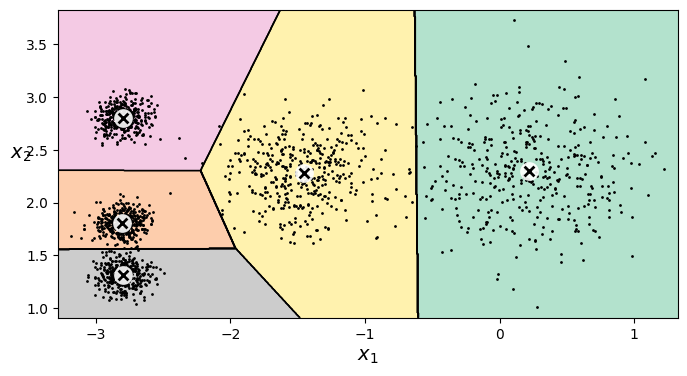

In [50]:
## visualize the best model

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans_10, X)
plt.show()

### Find the optimal number of clusters - the "elbow" plot

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


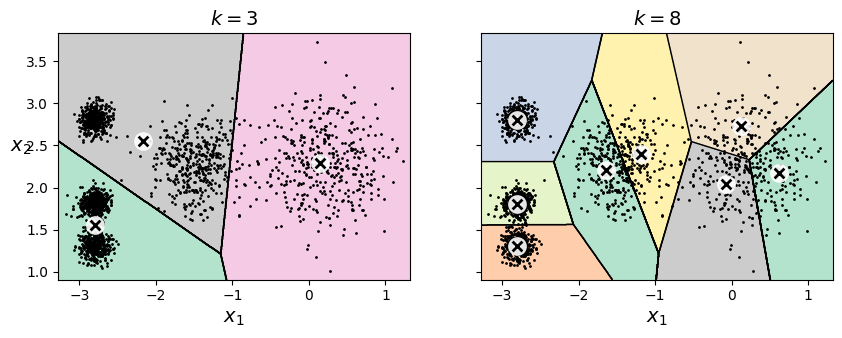

In [51]:
kmeans_k3 = KMeans(n_clusters=3)
kmeans_k8 = KMeans(n_clusters=8)

plot_clusterer_comparison(kmeans_k3, kmeans_k8, X, "$k=3$", "$k=8$")
plt.show()

In [52]:
kmeans_k3.inertia_

657.2636468168264

In [53]:
kmeans_k8.inertia_

120.58599552923228

In [54]:
## try different k values

kmeans_per_k = [KMeans(n_clusters=k).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explici

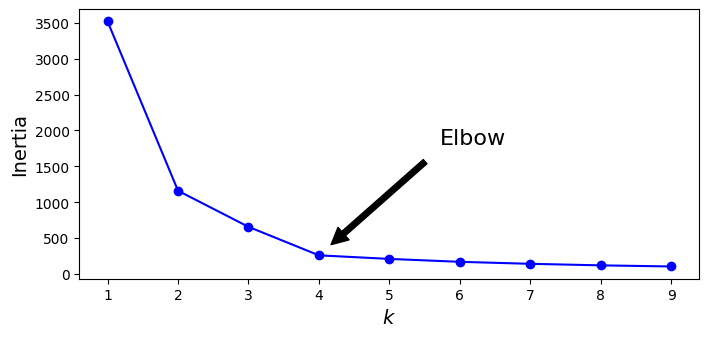

In [55]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(4, inertias[3]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
# plt.ylim(0, 1300)
plt.show()

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


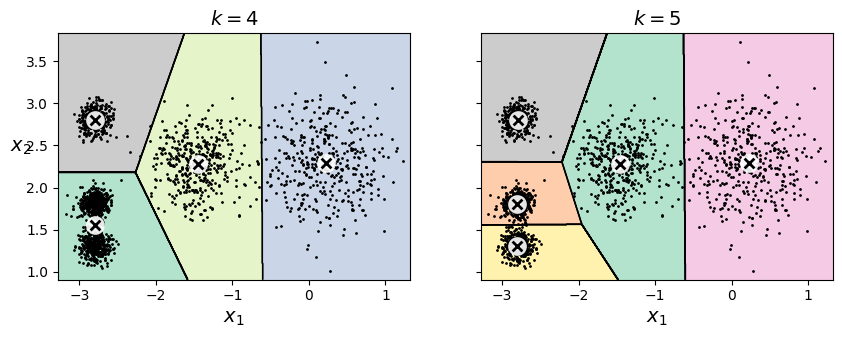

In [56]:
kmeans_k4 = KMeans(n_clusters=4)
kmeans_k5 = KMeans(n_clusters=5)

plot_clusterer_comparison(kmeans_k4, kmeans_k5, X, "$k=4$", "$k=5$")
plt.show()

As you can see, there is an elbow at $k=4$, which means that less clusters than that would be bad, and more clusters would not help much and might cut clusters in half. So $k=4$ is a pretty good choice. Of course in this example it is not perfect since it means that the two blobs in the lower left will be considered as just a single cluster, but it's a pretty good clustering nonetheless.

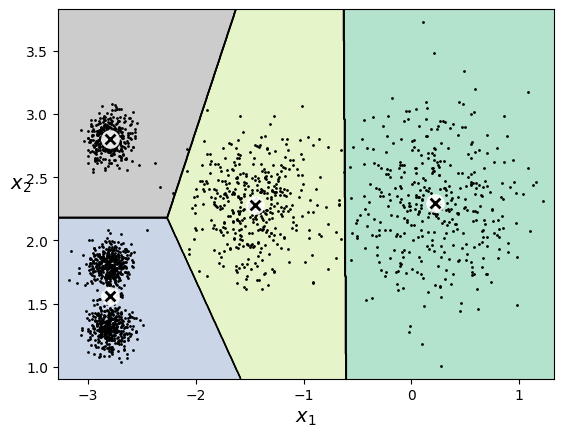

In [57]:
plot_decision_boundaries(kmeans_per_k[3], X)
plt.show()

### Find the optimal number of clusters - the `silhouette score`

The `silhouette score`, which is the mean silhouette coefficient over all the instances. An instance's silhouette coefficient is equal to $\frac{(b - a)}{\max(a, b)}$ where $a$ is the mean distance to the other instances in the same cluster (it is the mean intra-cluster distance), and $b$ is the mean nearest-cluster distance, that is the mean distance to the instances of the next closest cluster (defined as the one that minimizes $b$, excluding the instance's own cluster). The silhouette coefficient can vary between -1 and +1: a coefficient close to +1 means that the instance is well inside its own cluster and far from other clusters, while a coefficient close to 0 means that it is close to a cluster boundary, and finally a coefficient close to -1 means that the instance may have been assigned to the wrong cluster.

![](https://www.researchgate.net/profile/Frans_Coenen/publication/221570710/figure/fig1/AS:670029003644935@1536758771429/Derivation-of-the-Overall-Silhouette-Coefficient-OverallSil.png)

In [58]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.657769958414177

In [59]:
silhouette_scores = [silhouette_score(X, model.labels_)
                     for model in kmeans_per_k[1:]]

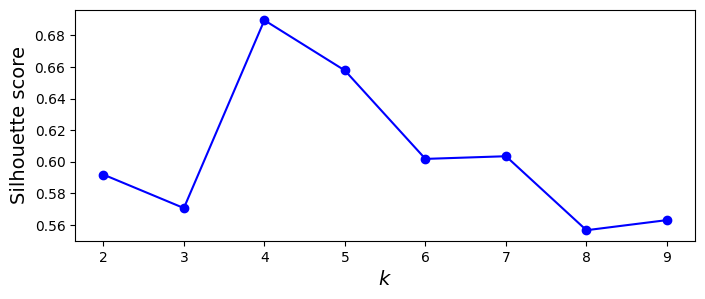

In [60]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

**It confirms that $k=4$ is a very good choice, and it also underlines the fact that $k=5$ is quite good as well, and much better than $k=6$ or $7$.**

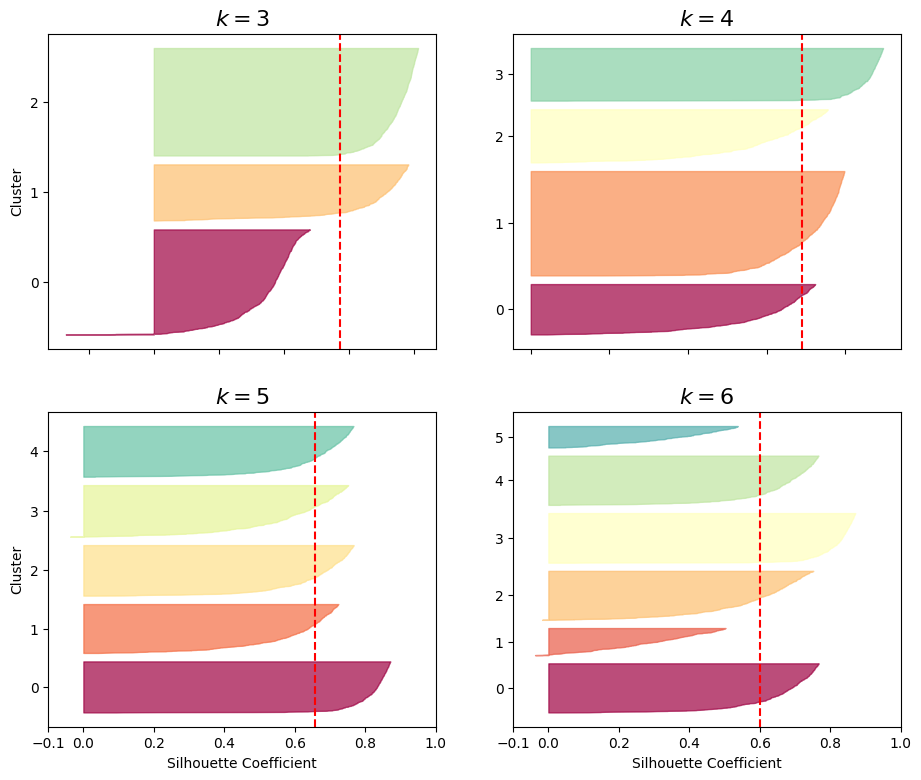

In [61]:
## the silhouette diagram

import matplotlib as mpl
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

## Limit of K-Means model

* Multiple run is needed to avoid suboptimal solutions
* Need to feed in a fixed `k` value
* Doesn't work well when clusters have varying sizes, different densities, or nonspherical shapes
    * It is important to scale the input features before you run the K-Means

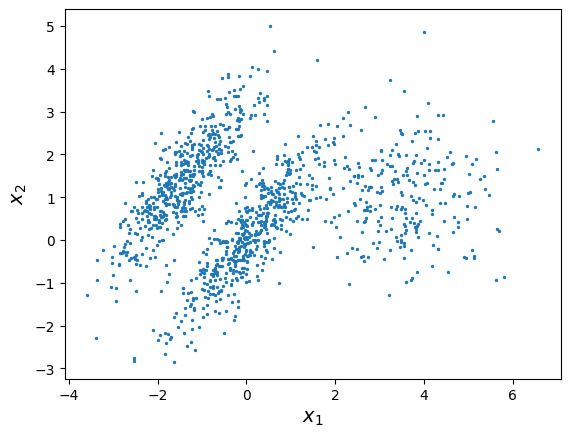

In [62]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

plt.scatter(X[:,0], X[:,1], s=2)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.show()

In [63]:
kmeans_good = KMeans(n_clusters=3, init=np.array([[-1.5, 2.5], [0.5, 0], [4, 0]]), n_init=1, random_state=42)
kmeans_bad = KMeans(n_clusters=3, random_state=42)
kmeans_good.fit(X)
kmeans_bad.fit(X)

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

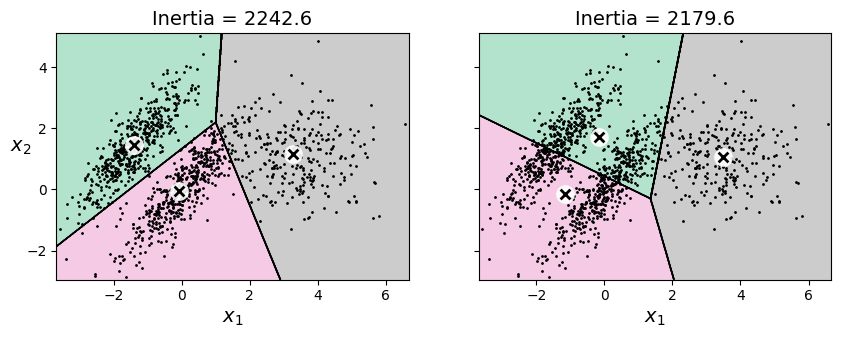

In [64]:
plt.figure(figsize=(10, 3.2))

plt.subplot(121)
plot_decision_boundaries(kmeans_good, X)
plt.title("Inertia = {:.1f}".format(kmeans_good.inertia_), fontsize=14)

plt.subplot(122)
plot_decision_boundaries(kmeans_bad, X, show_ylabels=False)
plt.title("Inertia = {:.1f}".format(kmeans_bad.inertia_), fontsize=14)

plt.show()

`Gaussian mixture models` works better in this case
* Reference: https://scikit-learn.org/stable/modules/mixture.html

## Applications of k-Means clustering

### Image segmentation
* Reference
    * https://matplotlib.org/tutorials/introductory/images.html
    * https://matplotlib.org/3.3.2/api/image_api.html

In [65]:
from matplotlib.image import imread
image = imread('../pics/ladybug.png')
image.shape

(533, 800, 3)

In [66]:
type(image)

numpy.ndarray

In [67]:
X = image.reshape(-1, 3)
X.shape

(426400, 3)

In [68]:
# kmeans.labels_

In [69]:
# kmeans.labels_.shape

In [70]:
x = np.array([1,2,3,4])
x[[0,0,1,1,2,2,3,3]]

array([1, 1, 2, 2, 3, 3, 4, 4])

In [71]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [72]:
segmented_img.shape

(533, 800, 3)

In [73]:
kmeans.cluster_centers_

array([[0.02197391, 0.10829672, 0.00567615],
       [0.9831093 , 0.9326913 , 0.02553865],
       [0.21325627, 0.38074526, 0.05518316],
       [0.60829306, 0.6286243 , 0.3857981 ],
       [0.3667915 , 0.51953304, 0.15321252],
       [0.0956641 , 0.2486789 , 0.01604258],
       [0.76501524, 0.19936322, 0.04393173],
       [0.87612635, 0.71745145, 0.03684875]], dtype=float32)

In [74]:
kmeans.labels_

array([0, 0, 0, ..., 5, 5, 0], dtype=int32)

In [75]:
kmeans.cluster_centers_[kmeans.labels_]

array([[0.02197391, 0.10829672, 0.00567615],
       [0.02197391, 0.10829672, 0.00567615],
       [0.02197391, 0.10829672, 0.00567615],
       ...,
       [0.0956641 , 0.2486789 , 0.01604258],
       [0.0956641 , 0.2486789 , 0.01604258],
       [0.02197391, 0.10829672, 0.00567615]], dtype=float32)

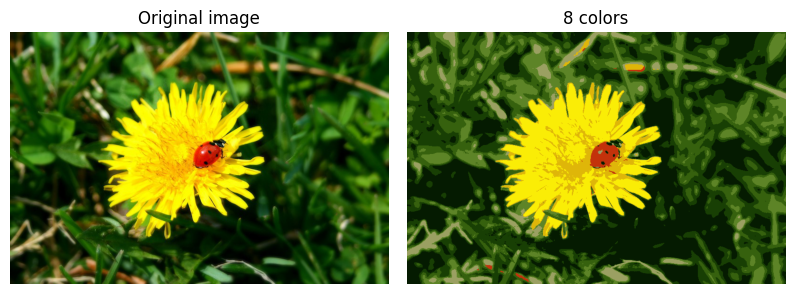

In [76]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(121)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

plt.subplot(122)
plt.imshow(segmented_img)
plt.title('8 colors')
plt.axis('off')
plt.show()

In [77]:
segmented_imgs = []
n_colors = (10, 8, 6, 4, 2)
for n_clusters in n_colors:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(X)
    segmented_img = kmeans.cluster_centers_[kmeans.labels_]
    segmented_imgs.append(segmented_img.reshape(image.shape))
    

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explici

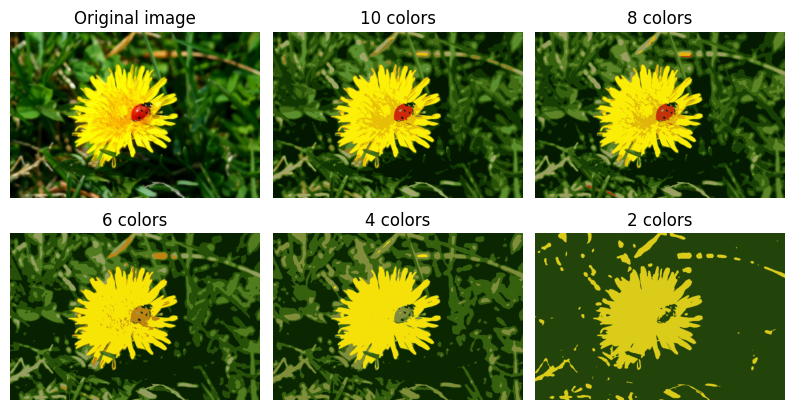

In [78]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(231)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
    plt.subplot(232 + idx)
    plt.imshow(segmented_imgs[idx])
    plt.title("{} colors".format(n_clusters))
    plt.axis('off')

plt.show()

### Data preprocessing

* The data reference: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html
* A dataset silimiar like the `MNIST database`: https://en.wikipedia.org/wiki/MNIST_database
* Each datapoint is a 8x8 image of a digit.
| Classes           | 10            |
|-------------------|---------------|
| Samples per class | ~180          |
| Samples total     | 1797          |
| Dimensionality    | 64            |
| Features          | integers 0-16 |

In [79]:
## load the data

from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

In [80]:
X_digits.shape

(1797, 64)

In [81]:
y_digits.shape

(1797,)

In [82]:
np.unique(y_digits)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [83]:
## train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)

In [84]:
X_train.shape

(1347, 64)

In [85]:
X_test.shape

(450, 64)

In [86]:
y_train.shape

(1347,)

In [87]:
y_test.shape

(450,)

The Logistic Regression model is typically used to fit/predict binary variable or variables with value between 0 and 1
$$
y = \sigma(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n)}}
$$


$\sigma(z)$ is also called the `sigmoid` function, it has the following property

$$
\frac{d\sigma(z)}{dz} = \sigma(z)(1-\sigma(z))
$$

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/88/Logistic-curve.svg/1200px-Logistic-curve.svg.png)

Linear Regression vs. Logistic Regression:
![](https://static.javatpoint.com/tutorial/machine-learning/images/linear-regression-vs-logistic-regression.png)
![](https://saedsayad.com/images/LogReg_1.png)

**Explain the logistic regression model fit**

$$
p = \sigma(z) = \frac{1}{1+e^{-z}} = \frac{1}{1+e^{-(\theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n)}}
$$

We could rewrite the relation to

$$
log(\frac{p}{1-p}) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n
$$

In [88]:
## fit a logistic regression model

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression() 
log_reg.fit(X_train, y_train)

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [89]:
## evaluate the model

log_reg.score(X_test, y_test)

0.96

https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [90]:
## Create a pipeline that will first cluster the training set into 50 clusters
## and replace the images with their distances to these 50 clusters, then apply a Logistic Regression model

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters=50, random_state=42)),
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)),
])
pipeline.fit(X_train, y_train)

/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [91]:
pipeline.score(X_test, y_test)

0.9733333333333334

In [92]:
%%time

## apply grid search on the optimal number of clusters

from sklearn.model_selection import GridSearchCV


param_grid = dict(kmeans__n_clusters=range(95, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv=3, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=95; total time=   2.0s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=95; total time=   1.7s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=95; total time=   2.5s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=96; total time=   2.2s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=96; total time=   1.8s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=96; total time=   2.2s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=97; total time=   2.0s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=97; total time=   1.4s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=97; total time=   1.9s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=98; total time=   2.1s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=98; total time=   1.7s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=98; total time=   1.7s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=99; total time=   2.1s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=99; total time=   2.0s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[CV] END ..............................kmeans__n_clusters=99; total time=   2.1s


/Users/xiangshiyin/Library/Caches/pypoetry/virtualenvs/data-programming-with-python-h2fMFruk-py3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


CPU times: user 2min 59s, sys: 48.8 s, total: 3min 47s
Wall time: 32.6 s


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(95, 100)}, verbose=2)

In [93]:
grid_clf.best_params_

{'kmeans__n_clusters': 98}

In [94]:
grid_clf.score(X_test, y_test)

0.9777777777777777